# Определение языка текста
#### © Шулюгин Иван МГУ ВМК 325. октябрь 2020

## Идея 
> Из доступных языков определяем общий алфавит, для каждого языка делаем вектор (вектор языка) размерности равной кол-ву всех букв и со значениями равными частотам букв, а после преобразуем входящий текст в вектор такого же формата и ищем ближайший вектор языка

## Содержание
> ### Автоматически готовим файлы с частотами и определяем доступные языки
> ### Структура данных для хранения языков
> ### Вектор входящего текста
> ### Ближайший язык
> ### Результат
> ### Тесты
> ### Вывод

## ====================================

## Автоматически готовим файлы с частотами и определяем доступные языки

In [32]:
import re, csv

Ограничимся следующими языками - русский, немецкий, английский, французский

Будем использовать уже выжатые данные с сайта http://practicalcryptography.com/cryptanalysis/letter-frequencies-various-languages/

In [33]:
# в директории data у нас есть файлы <lang>_monograms.txt
# из этих файлов мы будем делать словари с частотой
# посмотрим на содержимое монограмм английского языка
with open("data/english_monograms.txt", 'r') as file:
    for i in range(3):
        print(file.readline(), end="")

E 529117365
T 390965105
A 374061888


Подсчитаем частоту символов и сделаем csv-файл

In [34]:
# сначала общее колво символов
count = 0
reg = re.compile("\d+") # регулярное выражение для захвата числа в строке

with open("data/english_monograms.txt", 'r') as file:
    for line in file.readlines():
        number = (int)(re.findall(reg, line)[0]) # берем число из строки файла и преобразуем в int
        count += number # здесь суммируем абс.частоту всех символов
print(count)
# далее ищем относительную частоту и записываем в csv-файл

4374127904


In [35]:
# делаем csv-файл
with open('languages/english_monograms.csv', 'w') as english_monograms:
    with open("data/english_monograms.txt", 'r') as file:
        eng_writer = csv.writer(english_monograms)
        lines = file.readlines() # берем строки из файла
        file.close()
        data = [] # пустой список для записи в строку csv-файла
        for line in lines:
            ch = line.split()[0].lower() # берем символ из строки txt-файла
            number = (int)(re.findall(reg, line)[0]) # берем число из строки txt-файла
            fr = number/count # считаем относительную частоту
            # добавляем элементы к нашему пустому списку
            data.append(ch)
            data.append(fr)
            eng_writer.writerow(data) # записываем
            print(data) # выводим, что записываем в строку таблицы
            data.clear() # чистим список

['e', 0.1209652247516903]
['t', 0.08938126949659495]
['a', 0.08551690673195275]
['o', 0.07467265410810447]
['i', 0.0732511860723129]
['n', 0.07172184876283856]
['s', 0.06728203117491646]
['r', 0.0633271013284023]
['h', 0.04955707280570641]
['l', 0.04206464329306453]
['d', 0.03871183735737418]
['c', 0.03164435380900101]
['u', 0.026815809362304373]
['m', 0.025263217360184446]
['f', 0.021815103969122528]
['g', 0.020863354250923158]
['p', 0.020661660788966266]
['w', 0.018253618950416498]
['y', 0.017213606152473405]
['b', 0.016047959168228293]
['v', 0.01059346274662571]
['k', 0.008086975227142329]
['j', 0.002197788956104563]
['x', 0.0019135048594134572]
['z', 0.001137563214703838]
['q', 0.0010402453014323196]


Также проделаем со всеми файлами .txt

Как следствие этих действий, Вы можете закинуть в директорию data новые txt-файлы в формате (для каждой строки следующий шаблон)
#### [символ] [абсолютная_частота]\n
Еще правильно его назвав, примеры там же в директории data. Тогда появится таблица с относительной частотой символов данного языка

In [36]:
import os

In [37]:
# список файлов .txt
for file in os.listdir('data'):
    if file.endswith(".txt"): # указываем, что нужно расширение .txt
        print(file.split('.'))

['russian_monograms', 'txt']
['english_monograms', 'txt']
['french_monograms', 'txt']
['german_monograms', 'txt']


In [38]:
reg = re.compile("\d+") # регулярное выражение для захвата числа в строке
for file in os.listdir('data'): # смотрим доступнные данные
    if file.endswith(".txt"): # указываем, что нужно расширение .txt
        file_name = file.split('.')[0] # название файла
        print(file_name.split('_')[0]) # выводим название языка (то что до знака '_')
        with open("languages/"+file_name+".csv", 'w') as file_csv:
            with open("data/"+file_name+".txt", 'r') as file:
                lines = file.readlines() # берем строки из файла
                
                count = 0 # здесь будет сумма абсолютных частот
                for line in lines:
                    number = (int)(re.findall(reg, line)[0]) # берем число из строки файла и преобразуем в int
                    count += number # считаем абсолютную частоту всех символов
                    
                csv_writer = csv.writer(file_csv) # готовимся записывать в таблицу
                data = [] # пустой список для записи в строку csv-файла
                checksum = 0 # для проверки суммы относительных частот
                for line in lines:
                    ch = line.split()[0].lower() # берем символ из строки txt-файла
                    number = (int)(re.findall(reg, line)[0]) # берем число из строки txt-файла
                    fr = number/count # считаем относительную частоту
                    checksum += fr # суммируем частоты (должно получиться число от 1-eps до 1+eps)
                    # добавляем элементы к нашему пустому списку
                    data.append(ch)
                    data.append(fr)
                    csv_writer.writerow(data) # записываем
                    print(data) # выводим, что записываем в строку таблицы
                    data.clear() # чистим список
                print("checksum =",checksum)
        print()

russian
['о', 0.10607471474100134]
['е', 0.0821049050940211]
['а', 0.08036776086839842]
['и', 0.07977309760439355]
['н', 0.06719308679558825]
['т', 0.05828381589673569]
['с', 0.057069421922960197]
['р', 0.0538024551515306]
['в', 0.047453759972744945]
['л', 0.043219980287786564]
['к', 0.03486027159690161]
['м', 0.031089860990595148]
['д', 0.029539903102811363]
['п', 0.02822935006043711]
['у', 0.022825802709782222]
['я', 0.01997498643435968]
['ы', 0.019111193827779187]
['г', 0.018766858380065393]
['з', 0.016080116506163235]
['б', 0.015490709380267972]
['ь', 0.013852738495995076]
['й', 0.013597278880345372]
['ч', 0.012322595683708366]
['х', 0.010204066830420801]
['ж', 0.008043752621122098]
['ю', 0.006283775279410367]
['ц', 0.005783417306262376]
['ш', 0.005460803461560685]
['ф', 0.004093510502489252]
['щ', 0.003401150890782593]
['э', 0.0030949723682558872]
['ё', 0.002214341280519959]
['ъ', 0.0003355450748036055]
checksum = 1.0000000000000004

english
['e', 0.1209652247516903]
['t', 0.08938

Теперь у нас есть готовые таблицы языков

## ====================================

## Структура данных для хранения языков

Пример структуры словаря для хранения всех данных (снизу вывод ячейки можно сразу посмотреть, чтобы не углубляться в код)

In [39]:
# эксперименты со словарем, думаем в какой форме лучше работать с данными
langrec = {}
langrec['characters'] = {}
for ch in 'abcd':
    langrec['characters'][ch] = None # здесь мы можем узнать кол-во вхождений буквы в алфавиты разных языков
# нам нужно заводить вектор размером кол-во_букв
langrec['languages'] = ['russian', 'german']
for l in langrec['languages']:
    langrec[l+'_dict'] = '{здесь храним словарь языка}'
    langrec[l+'_vector'] = ['здесь храним вектор языка в пространстве всех букв']

# выводим структуру
print('====langrec (dict)====\n')
for data in langrec:
    print(data+':\n ', langrec[data])
print('\n======================\n')
# здесь проверка возмодностей
print("b in langrec['charaters'] =", 'b' in langrec['characters'])
print("z in langrec['charaters'] =", 'z' in langrec['characters'])
print(langrec['characters'])
langrec.clear()

====langrec (dict)====

characters:
  {'a': None, 'b': None, 'c': None, 'd': None}
languages:
  ['russian', 'german']
russian_dict:
  {здесь храним словарь языка}
russian_vector:
  ['здесь храним вектор языка в пространстве всех букв']
german_dict:
  {здесь храним словарь языка}
german_vector:
  ['здесь храним вектор языка в пространстве всех букв']


b in langrec['charaters'] = True
z in langrec['charaters'] = False
{'a': None, 'b': None, 'c': None, 'd': None}


Теперь заведем эту структуру сверху

In [41]:
langrec.clear()
langrec = {}
langrec['languages'] = []
langrec['characters'] = {}
print(langrec)

{'languages': [], 'characters': {}}


In [42]:
# вместо None в characters будем считать колво вхождений буквы в алфаваиты
for file_name in os.listdir('languages'): # переходим в готовые таблицы наших языков
    if file_name.endswith('.csv'): # если это таблица, то...
        lang_name = file_name.split('_')[0]
        with open('languages/'+file_name, 'r') as file_csv:
            if lang_name not in langrec['languages']: # если нет языка в списке языков, то...
                langrec['languages'].append(lang_name) # ...заносим в список
            langrec[lang_name+'_dict'] = {} # здесь будет словарь языка
            langrec[lang_name+'_vector'] = []
            
            rows = csv.reader(file_csv) # берем ряды таблицы
            for row in rows:
                ch = row[0] # берем символ
                fr = float(row[1])
                if ch not in langrec['characters']: # если символа нет
                    langrec['characters'][ch] = 1 # заносим его, встретили первый раз
                else:
                    langrec['characters'][ch] += 1 # иначе увидели еще одно вхождение в алфавит другого языка
                
                langrec[lang_name+'_dict'][ch] = fr # заносим букву в словарь языка
                
            print(lang_name + " is listed") # выводим, что закончили с языком
            print(' updated number of characters =', len(langrec['characters'])) # посмотрим на колво символов

german is listed
 updated number of characters = 30
russian is listed
 updated number of characters = 63
english is listed
 updated number of characters = 63
french is listed
 updated number of characters = 78


In [43]:
# теперь, когда мы знаем все возможные буквы, мы можем делать векторы языков
# размерность таких векторов должна быть равна размерности колву всевозможных букв
# для упорядоченности, будем идти по ключам characters и строить вектор каждого языка
for lang_name in langrec['languages']: # выбираем язык
    for ch in langrec['characters']: # берем очередную букву из всех возможных
        if ch in langrec[lang_name+'_dict']: # если такая буква есть в словаре языка
            langrec[lang_name+'_vector'].append(langrec[lang_name+'_dict'][ch]) # добавляем частоту буквы
        else:
            langrec[lang_name+'_vector'].append(0.0) # иначе на этой позиции частота 0

In [44]:
# выводим полученную структуру
print('\n\n====LANGREC (dict)====')
for key in langrec:
    print(key+':\n  ',langrec[key])
print('======================\n')
#langrec.clear()



====LANGREC (dict)====
languages:
   ['german', 'russian', 'english', 'french']
characters:
   {'e': 3, 'n': 3, 'r': 3, 'i': 3, 't': 3, 's': 3, 'a': 3, 'd': 3, 'h': 3, 'u': 3, 'l': 3, 'g': 3, 'o': 3, 'm': 3, 'c': 3, 'b': 3, 'f': 3, 'k': 3, 'w': 3, 'z': 3, 'p': 3, 'v': 3, 'ü': 2, 'ä': 1, 'j': 3, 'ö': 1, 'ß': 1, 'y': 3, 'x': 3, 'q': 3, 'о': 1, 'е': 1, 'а': 1, 'и': 1, 'н': 1, 'т': 1, 'с': 1, 'р': 1, 'в': 1, 'л': 1, 'к': 1, 'м': 1, 'д': 1, 'п': 1, 'у': 1, 'я': 1, 'ы': 1, 'г': 1, 'з': 1, 'б': 1, 'ь': 1, 'й': 1, 'ч': 1, 'х': 1, 'ж': 1, 'ю': 1, 'ц': 1, 'ш': 1, 'ф': 1, 'щ': 1, 'э': 1, 'ё': 1, 'ъ': 1, 'é': 1, 'à': 1, 'è': 1, 'ê': 1, 'ç': 1, 'ô': 1, 'â': 1, 'î': 1, 'ù': 1, 'œ': 1, 'û': 1, 'ï': 1, 'ë': 1, 'æ': 1, 'ÿ': 1}
german_dict:
   {'e': 0.1599284975986358, 'n': 0.09588346563675158, 'r': 0.07705646551730984, 'i': 0.07600017886384124, 't': 0.06427792277109229, 's': 0.06410246803153259, 'a': 0.06339396809843473, 'd': 0.049241581147496126, 'h': 0.04105239917540454, 'u': 0.03760394641413845, '

In [45]:
# проверим, не нарушили ли мы размерность
for lang_name in langrec['languages']:
    print('size of '+lang_name+'_vector', len(langrec[lang_name+'_vector']))
    
# посмотрим сколько букв в русском языке
number = 0
for fr in langrec['russian_vector']: 
    if fr != 0:
        number += 1
print('size of russian alphabet is ', number)

size of german_vector 78
size of russian_vector 78
size of english_vector 78
size of french_vector 78
size of russian alphabet is  33


Все верно!

In [46]:
import pickle

In [47]:
# сохраним словарь (чтобы заново его не делать, на основе этих языков)

name = 'langrec_monograms'
with open('obj/'+ name + '.pkl', 'wb') as f:
    pickle.dump(langrec, f, pickle.HIGHEST_PROTOCOL)


# если хотите посмотреть, как загружать сохраненный словарь, уберите комментарии снизу
'''
with open('obj/'+ name + '.pkl', 'rb') as f:
    dictload = pickle.load(f)
    
print('\n\n====loaded LANGREC (dict)====')
for key in dictload:
    print(key+':\n  ',dictload[key])
print('======================\n')
'''
print()

Теперь остается делать вектор входящего текста и смотреть cos между векторами языков

## ====================================

## Вектор входящего текста

In [48]:
# тестовые предложения
text_rus = """Привет, как дела?"""
text_eng = """Hi, how are you?"""
text_ger = """Hallo! Wie geht’s?"""
text_fre = """Salut, ça va ?"""

Разделители
.?!:,;-_―"'’‘“”„§€$£%&—/\⁄()[]{}+*~#´`^°•…=<>«»–|0123456789

In [107]:
# тут есть проблема с регулярными выражениями, они не захватыют некоторые буквы
# например русские буквы
# а у нас могут быть вообще разные символы, хоть иероглифы, если добавим в data

# функция превращения текста в вектор (размерность из словаря языков)
def text_to_vec(text):
    delim = """ .?!:,;-_―"'’‘“”„§€$£%&—/\⁄()[]{}+*~#´`^°•…=<>«»–|0123456789"""
    name = 'langrec_monograms' # имя словаря языков
    with open('obj/'+ name + '.pkl', 'rb') as f: 
        langrec = pickle.load(f) # загружаем его
    
    data = '' # здесь мы очистим и преобразуем входящий текст
    for ch in text: # берем символ из текста
        if ch not in delim: # проверяем не разделитель ли это
            data = data + ch # склеиваем
            data = data.lower() # все в нижнем регистре
    dict_text = {} # заводим словарь для подсчета здесь символов
    count = 0 # общее число символов
    for ch in data:
        if ch not in langrec['characters']: # если буквы нет в словаре
            continue
        count += 1
        if ch in dict_text: 
            dict_text[ch] += 1 # если уже встречали этот символ
        else:
            dict_text[ch] = 1 # если еще не встречали этот символ
            
    for ch in dict_text:
        dict_text[ch] = dict_text[ch]/count # считаем относительную частоту символа в тексте
    
    text_vector = [] # создаем вектор
    for ch in langrec['characters']: # берем очередную букву из всех возможных
        if ch in dict_text: # если такая буква есть во входящем тексте
            text_vector.append(dict_text[ch]) # добавляем частоту буквы
        else:
            text_vector.append(0.0) # иначе на этой позиции частота 0
    return text_vector


        
#text_to_vec(text_rus)
#text_to_vec(text_eng)
#text_to_vec(text_ger)
#text_to_vec(text_fre)

vec = text_to_vec(text_rus)
print("вектор входящего текста, размер =", len(vec), "\n  ", vec)

вектор входящего текста, размер = 78 
   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15384615384615385, 0.15384615384615385, 0.07692307692307693, 0.0, 0.07692307692307693, 0.0, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.15384615384615385, 0.0, 0.07692307692307693, 0.07692307692307693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## ====================================

## Ближайший язык

In [50]:
import numpy as np

In [118]:
# функция распознавания языка из строки
def recog(text):
    if text == '':
        return None
    name = 'langrec_monograms' # имя словаря языков
    with open('obj/'+ name + '.pkl', 'rb') as f: 
        langrec = pickle.load(f) # загружаем его
    
    text_vec = text_to_vec(text) # берем вектор входящего текста
    text_vec = text_vec / np.linalg.norm(text_vec) # нормализуем вектор входящего текста
    # для того, чтобы в скалярном произведение мы сразу получили cos
    
    args = [] # здесь будем хранить результаты скалярного произведения
    for lang_name in langrec['languages']: # идем по доступным языкам          
        vec = langrec[lang_name+'_vector']/np.linalg.norm(langrec[lang_name+'_vector']) # нормализуем вектор языка
        args.append(np.dot(text_vec, vec)) # добавляем результат скалярного произведения
        
    # определяем ближайший язык
    proximity = max(args) # близость к языку
    i_max = args.index(proximity) # номер ближайшего языка
    i = 0
    for lang_name in langrec['languages']:
        if i_max == i:
            return [lang_name, proximity]
        i+=1
    print('!WARN! recog')
    return args

In [119]:
print(recog('привет как дела??????'))

['russian', 0.7136078062858622]


In [120]:
# функция распознавания языка из файла
def recog_file(file):
    with open(file, 'r') as f:
        text = f.read()
        return recog(text)

In [121]:
print(recog_file('README.txt'))

['russian', 0.7136078062858622]


Верно определило!

# ====================================

## Результат

> Если хотите сами поэкспериментировать тут, достаточно запустить ячейки снизу

In [14]:
import os, csv
import re
import pickle
import numpy as np

# процедура генерация таблиц языков из txt-файлов в директории data
def lang_generate_csv():
    reg = re.compile("\d+") # регулярное выражение для захвата числа в строке
    for file in os.listdir('data'): # смотрим доступнные данные
        if file.endswith(".txt"): # указываем, что нужно расширение .txt
            file_name = file.split('.')[0] # название файла
            #print(file_name.split('_')[0]) # выводим название языка (то что до знака '_')
            with open("languages/"+file_name+".csv", 'w') as file_csv:
                with open("data/"+file_name+".txt", 'r') as file:
                    lines = file.readlines() # берем строки из файла

                    count = 0 # здесь будет сумма абсолютных частот
                    for line in lines:
                        number = (int)(re.findall(reg, line)[0]) # берем число из строки файла и преобразуем в int
                        count += number # считаем абсолютную частоту всех символов

                    csv_writer = csv.writer(file_csv) # готовимся записывать в таблицу
                    data = [] # пустой список для записи в строку csv-файла
                    checksum = 0 # для проверки суммы относительных частот
                    for line in lines:
                        ch = line.split()[0].lower() # берем символ из строки txt-файла
                        number = (int)(re.findall(reg, line)[0]) # берем число из строки txt-файла
                        fr = number/count # считаем относительную частоту
                        checksum += fr # суммируем частоты (должно получиться число от 1-eps до 1+eps)
                        # добавляем элементы к нашему пустому списку
                        data.append(ch)
                        data.append(fr)
                        csv_writer.writerow(data) # записываем
                        #print(data) # выводим, что записываем в строку таблицы
                        data.clear() # чистим список
                    #print("checksum =",checksum)
    return None

# процедура генерации словаря языков
def lang_generate_langrec():
    langrec = {}
    langrec['languages'] = []
    langrec['characters'] = {}
    for file_name in os.listdir('languages'): # переходим в готовые таблицы наших языков
        if file_name.endswith('.csv'): # если это таблица, то...
            lang_name = file_name.split('_')[0]
            with open('languages/'+file_name, 'r') as file_csv:
                if lang_name not in langrec['languages']: # если нет языка в списке языков, то...
                    langrec['languages'].append(lang_name) # ...заносим в список
                langrec[lang_name+'_dict'] = {} # здесь будет словарь языка
                langrec[lang_name+'_vector'] = []

                rows = csv.reader(file_csv) # берем ряды таблицы
                for row in rows:
                    ch = row[0] # берем символ
                    fr = float(row[1])
                    if ch not in langrec['characters']: # если символа нет
                        langrec['characters'][ch] = 1 # заносим его, встретили первый раз
                    else:
                        langrec['characters'][ch] += 1 # иначе увидели еще одно вхождение в алфавит другого языка

                    langrec[lang_name+'_dict'][ch] = fr # заносим букву в словарь языка

                #print(lang_name + " is listed") # выводим, что закончили с языком
                #print(' updated number of characters =', len(langrec['characters'])) # посмотрим на колво символов
    # теперь, когда мы знаем все возможные буквы, мы можем делать векторы языков
    # размерность таких векторов должна быть равна размерности колву всевозможных букв
    # для упорядоченности, будем идти по ключам characters и строить вектор каждого языка
    for lang_name in langrec['languages']: # выбираем язык
        for ch in langrec['characters']: # берем очередную букву из всех возможных
            if ch in langrec[lang_name+'_dict']: # если такая буква есть в словаре языка
                langrec[lang_name+'_vector'].append(langrec[lang_name+'_dict'][ch]) # добавляем частоту буквы
            else:
                langrec[lang_name+'_vector'].append(0.0) # иначе на этой позиции частота 0
                
    # сохраним словарь (чтобы заново его не делать, на основе этих языков)
    name = 'langrec_monograms'
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(langrec, f, pickle.HIGHEST_PROTOCOL)
    return None

# процедура генерация файлов и словаря (чтобы добавили языки, нажали кнопку и полетели)
def lang_generate():
    lang_generate_csv()
    lang_generate_langrec()
    return None

# функция превращения текста в вектор (размерность из словаря языков)
def text_to_vec(text):
    delim = """ .?!:,;-_―"'’‘“”„§€$£%&—/\⁄()[]{}+*~#´`^°•…=<>«»–|0123456789"""
    name = 'langrec_monograms' # имя словаря языков
    with open('obj/'+ name + '.pkl', 'rb') as f: 
        langrec = pickle.load(f) # загружаем его
    
    data = '' # здесь мы очистим и преобразуем входящий текст
    for ch in text: # берем символ из текста
        if ch not in delim: # проверяем не разделитель ли это
            data = data + ch # склеиваем
            data = data.lower() # все в нижнем регистре
    dict_text = {} # заводим словарь для подсчета здесь символов
    count = 0 # общее число символов
    for ch in data:
        if ch not in langrec['characters']: # если буквы нет в словаре
            continue
        count += 1
        if ch in dict_text: 
            dict_text[ch] += 1 # если уже встречали этот символ
        else:
            dict_text[ch] = 1 # если еще не встречали этот символ
            
    for ch in dict_text:
        dict_text[ch] = dict_text[ch]/count # считаем относительную частоту символа в тексте
    
    text_vector = [] # создаем вектор
    for ch in langrec['characters']: # берем очередную букву из всех возможных
        if ch in dict_text: # если такая буква есть во входящем тексте
            text_vector.append(dict_text[ch]) # добавляем частоту буквы
        else:
            text_vector.append(0.0) # иначе на этой позиции частота 0
    return text_vector

# функция распознавания языка из строки
def recog(text):
    if text == '':
        return None
    name = 'langrec_monograms' # имя словаря языков
    with open('obj/'+ name + '.pkl', 'rb') as f: 
        langrec = pickle.load(f) # загружаем его
    
    text_vec = text_to_vec(text) # берем вектор входящего текста
    text_vec = text_vec / np.linalg.norm(text_vec) # нормализуем вектор входящего текста
    # для того, чтобы в скалярном произведение мы сразу получили cos
    
    args = [] # здесь будем хранить результаты скалярного произведения
    for lang_name in langrec['languages']: # идем по доступным языкам          
        vec = langrec[lang_name+'_vector']/np.linalg.norm(langrec[lang_name+'_vector']) # нормализуем вектор языка
        args.append(np.dot(text_vec, vec)) # добавляем результат скалярного произведения
        
    # определяем ближайший язык
    proximity = max(args) # близость к языку
    i_max = args.index(proximity) # номер ближайшего языка
    i = 0
    for lang_name in langrec['languages']:
        if i_max == i:
            return [lang_name, proximity]
        i+=1
    print('!WARN! recog')
    return args

# функция распознавания языка из файла
def recog_file(file):
    with open(file, 'r') as f:
        text = f.read()
        return recog(text)

In [202]:
# собираем нашу модель
lang_generate()

Снизу появляется еще польский и испанский язык, так как я проверил автоматическую генерацию доступных языков, с помощью добавления файлов в data - это очень удобно

In [22]:
tests = ["Привет как дела, дорогой мой друг?",
         "Tu penses que ces tests fonctionnent?",
         "Aber wir verstehen, dass bei dieser Methode die Genauigkeit klein ist", 
         "Puede generar automáticamente bigramas a partir de los archivos añadidos?",
         "Ale im więcej tekstu, tym lepsza dokładność!",
         "Heavens! what a virulent attack!"]
for t in tests:
    print(recog(t))

['russian', 0.7827971530719462]
['french', 0.8116641329302788]
['german', 0.9350814741323588]
['spanish', 0.9421068054942972]
['polish', 0.8679082698761438]
['english', 0.8165465416710913]


# ====================================

## Тесты

Для тестов будем использовать переводы романа-эпопеи "Война и мир" Л.Н. Толстого на английском и французском. Также используем для немецкого и русского перевод книги "Приключения Тома Сойера" Марка Твена.

Сделал такой выбор, так как переводы приближены к современному языку. А для русских и немецких тестов на основе романа-эпопеи "Война и мир" те переводы, которые я нашел, нужно очищать от французский вставок.

Файлы в директории text
- французский french_guerre_et_paix.txt
- английский english_war_and_peace.txt (на первый взгляд без французских вставок)
- немецкий german_die_abenteuer_ts.txt
- русский russian_pts.txt (!перенесен в директорию text_excluded)

#### Однако стоит заметить, использование русских тестов будет увеличивать точность (так как они используют кириллицу, которая в данном наборе языков, будет сразу определяться)
#### Для более надежной оценки нужны еще языки, которые также используют кириллицу, например сербский, болгарский, македонский, украинский и др.

Сделаем csv-файлы в директории test, которые содержат в ряду
> #### [название языка] [строка]

In [56]:
%%time
# это обещает быть тяжеловесной ячейкой, засечем время

# кол-во слов в тесте
count = [5, 10, 20, 50, 100, 200, 500, 1000, 5000]
# кол-во тестов для одного языка такое, как идти по count[::-1]

# идем по файлам и генерим таблицы тестов с заданным кол-вом слов
# ничего страшного, что у нас будут идти тесты одного языка подряд
# мы ведь не для соревнования датасет делаем, а для тестирование
# модель это никак не сможет учесть
for word_count in count: # берем нужно кол-во слов
    test_count = count[-1-count.index(word_count)] # кол-во тестов (идем в обратном порядке по списку count)
    with open('test/'+(str)(word_count)+'_tests.csv', 'w') as file_csv: # создаем файл
        csv_writer = csv.writer(file_csv) # готовимся записывать
        data = [] # пустой список для записи в строку csv-файла

        for file in os.listdir('text'): # идем по текстам
            if file.endswith(".txt"):
                print('making tests based on', file, 'with count', test_count)
                text_lang = file.split('_')[0] # язык нашего текста
                with open('text/'+file, 'r') as text:

                        text_list = text.read().split()
                        for i in range(test_count): # !!! in range test_count
                            test = ' '.join(text_list[0:word_count])
                            #result = recog(test) # если захотите убрать тут коммент, снизьте кол-во итераций по i
                            #print(i, text_lang, result, (int)(result[0] == text_lang), '::', test) # тут тоже
                            text_list = text_list[word_count:] # оставшиеся слова, которые еще не попали в тесты
                            data.append(text_lang) # добавляем название языка
                            data.append(test) # добавляем тест
                            csv_writer.writerow(data) # записываем
                            data.clear() # чистим список

print('DONE!')

making tests based on german_die_abenteuer_ts.txt with count 5000
making tests based on french_guerre_et_paix.txt with count 5000
making tests based on english_war_and_peace.txt with count 5000
making tests based on german_die_abenteuer_ts.txt with count 1000
making tests based on french_guerre_et_paix.txt with count 1000
making tests based on english_war_and_peace.txt with count 1000
making tests based on german_die_abenteuer_ts.txt with count 500
making tests based on french_guerre_et_paix.txt with count 500
making tests based on english_war_and_peace.txt with count 500
making tests based on german_die_abenteuer_ts.txt with count 200
making tests based on french_guerre_et_paix.txt with count 200
making tests based on english_war_and_peace.txt with count 200
making tests based on german_die_abenteuer_ts.txt with count 100
making tests based on french_guerre_et_paix.txt with count 100
making tests based on english_war_and_peace.txt with count 100
making tests based on german_die_abente

Отдельно сделал дополнительно тест-файл с кол-вом слов 3 (по 5000 тестов на файл в директории text)

Вообще можно добавить еще тексты в директорию text с названием [language]_*.txt и они будут автоматически добавлены

Посмотрим, что у нас получилось

In [84]:
# рассмотрим файл с тестами по 10 слов
# и попробуем распознавать
with open('test/10_tests.csv', 'r') as text:
    csv_reader = csv.reader(text)
    i = 0
    for row in csv_reader:
        if (i < 2) or (i > 999 and i < 1002):
            print(row)
            print("I think it's ...", recog(row[1])[0])
            print()
        i+=1
        
print('number of tests in file', i)

['german', 'Vorwort des Autors. Die meisten der hier erzählten Abenteuer haben']
I think it's ... german

['german', 'sich tatsächlich zugetragen. Das eine oder das andere habe ich']
I think it's ... german

['french', '«Eh bien, prince, que vous disais-je? Gênes et Lucques sont']
I think it's ... french

['french', 'devenues les propriétés de la famille Bonaparte. Aussi, je vous']
I think it's ... french

number of tests in file 3000


Теперь протестируем

In [112]:
%%time
test_lang = [] # массив для результатов тестирования langrec
for file in os.listdir('test'): # идем по нашим тестам
    if file.endswith('csv'):
        with open('test/'+file, 'r') as test:
            print(file, 'is finished')
            csv_reader = csv.reader(test) # готовимся читать
            word_count = (int)(file.split('_')[0]) # кол-во слов в одном тесте
            hit = 0 # здесь считаем кол-во верных ответов
            count = 0 # здесь считаем кол-во тестов
            for row in csv_reader:
                result = recog(row[1])[0]
                if result == row[0]: # если мы верно указали язык
                    hit +=1
                count+=1
                
            accuracy = hit / count # считаем точность
            print('accuracy is',accuracy,'\n')
            test_lang.append([accuracy, word_count]) # добавляем результат в массив

200_tests.csv is finished
accuracy is 1.0 

10_tests.csv is finished
accuracy is 0.851 

1000_tests.csv is finished
accuracy is 1.0 

5_tests.csv is finished
accuracy is 0.7206 

100_tests.csv is finished
accuracy is 0.9933333333333333 

3_tests.csv is finished
accuracy is 0.646 

5000_tests.csv is finished
accuracy is 1.0 

50_tests.csv is finished
accuracy is 0.9816666666666667 

20_tests.csv is finished
accuracy is 0.9286666666666666 

500_tests.csv is finished
accuracy is 1.0 

CPU times: user 1min 3s, sys: 2.92 s, total: 1min 5s
Wall time: 1min 7s


### Изобразим результат на гистограмме

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
df = pd.DataFrame(test_lang, columns=['accuracy', 'words in test'])
print(df)

   accuracy  words in test
0  1.000000            200
1  0.851000             10
2  1.000000           1000
3  0.720600              5
4  0.993333            100
5  0.646000              3
6  1.000000           5000
7  0.981667             50
8  0.928667             20
9  1.000000            500


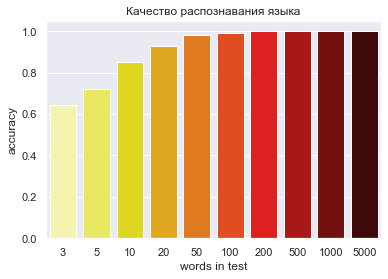

In [193]:
sns.barplot(x="words in test", y="accuracy", palette="hot_r", data=df)
plt.title("Качество распознавания языка")
plt.show()

Видим, что отличная точность для больших тестов, начиная от 200 слов

### Увеличим кол-во языков (добавив из директории more_data языки и запустив langrec_build()) 

Наш набор теперь
> russian spanish english french german icelandic swedish danish polish

In [198]:
%%time 
# протестировал как выше

200_tests.csv is finished
accuracy is 1.0 

10_tests.csv is finished
accuracy is 0.743 

1000_tests.csv is finished
accuracy is 1.0 

5_tests.csv is finished
accuracy is 0.5652 

100_tests.csv is finished
accuracy is 0.9933333333333333 

3_tests.csv is finished
accuracy is 0.4534666666666667 

5000_tests.csv is finished
accuracy is 1.0 

50_tests.csv is finished
accuracy is 0.98 

20_tests.csv is finished
accuracy is 0.8886666666666667 

500_tests.csv is finished
accuracy is 1.0 

CPU times: user 1min 17s, sys: 3.28 s, total: 1min 20s
Wall time: 1min 23s


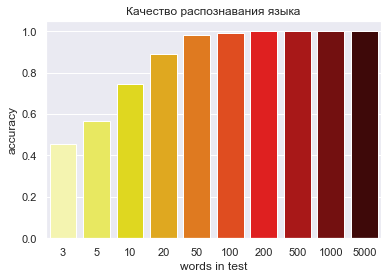

In [201]:
df = pd.DataFrame(test_lang, columns=['accuracy', 'words in test'])
sns.barplot(x="words in test", y="accuracy", palette="hot_r", data=df)
plt.title("Качество распознавания языка")
plt.show()

Видно, что точность уменьшилась, при увеличении языков

# ====================================

## Вывод
> Данный метод работает плохо работает с маленькими текстами. Начинает безошибочно определять языки только от 200 слов. Кол-во языков возможных для распознавания также уменьшают точность.

# ====================================

### Идеи и другие алгоритмы

- Ориентироваться на N-граммы и частоту их употребления в языках.
- Использования всех содержащихся подстрок. Такой способ был реализован в библиотеке ldig (Language Detection with Infinity Gram)

# ====================================

#### © Шулюгин Иван МГУ ВМК 325. октябрь 2020

- telegram: vsha96